pip install mediapipe
brew install wget

In [10]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
from matplotlib import pyplot as plt

In [2]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [15]:
model_path = 'gesture_recognizer.task'

Testing Model

In [17]:
BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = GestureRecognizerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE,
    num_hands=2)

recognizer = GestureRecognizer.create_from_options(options)

I0000 00:00:1744070357.474798 1308483 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1744070357.476323 1308483 gesture_recognizer_graph.cc:129] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I0000 00:00:1744070357.481595 1308483 hand_gesture_recognizer_graph.cc:250] Custom gesture classifier is not defined.
W0000 00:00:1744070357.498134 1313274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744070357.511151 1313274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744070357.511706 1313278 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744070357.511746 1313278 inference_f

In [5]:
IMAGE_FILENAMES = ['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']

for name in IMAGE_FILENAMES:
    !curl -OL https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46651  100 46651    0     0   484k      0 --:--:-- --:--:-- --:--:--  489k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19125  100 19125    0     0   253k      0 --:--:-- --:--:-- --:--:--  255k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28894  100 28894    0     0   305k      0 --:--:-- --:--:-- --:--:--     0:--:-- --:--:-- --:--:--  306k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36757  100 36757    0     0   408k      0 --:--:-- --:--:-- --:--:--  412k


In [8]:
import cv2
import math
from matplotlib import pyplot as plt

# from google.colab.patches import cv2_imshow
# from cv2 import cv2_imshow
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(6, 6))
  plt.imshow(img_rgb)
  plt.axis('off')  # Hide axes
  plt.title("Resized Image")
  plt.show()


# Preview the images.
# images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
# for name, image in images.items():
#   print(name)
#   resize_and_show(image)

In [9]:
images = []
results = []

for image_file in IMAGE_FILENAMES:
  print(image_file)
  image = mp.Image.create_from_file(image_file)
  print(type(image))
  recognition_result = recognizer.recognize(image)

  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))

# display_batch_of_images_with_gestures_and_hand_landmarks(images, results)
for r in results:
  for i in r:
    print(i)

thumbs_down.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
victory.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
thumbs_up.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
pointing_up.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
Category(index=-1, score=0.7730692625045776, display_name='', category_name='Thumb_Down')
[[NormalizedLandmark(x=0.3775921165943146, y=0.44845569133758545, z=-7.660036658307945e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.45660433173179626, y=0.5906895995140076, z=-0.1227630078792572, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5610467195510864, y=0.709786593914032, z=-0.21684986352920532, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6086992621421814, y=0.815122127532959, z=-0.29637429118156433, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6378445029258728, y=0.908831775188446, z=-0.3579285144805908, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.89

W0000 00:00:1743533967.733724 24594625 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']


I0000 00:00:1743534027.346891 24594347 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1743534027.376951 24597437 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743534027.389549 24597437 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


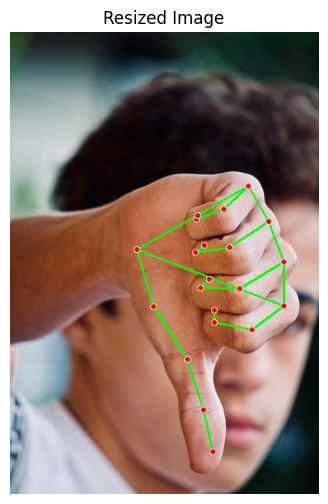

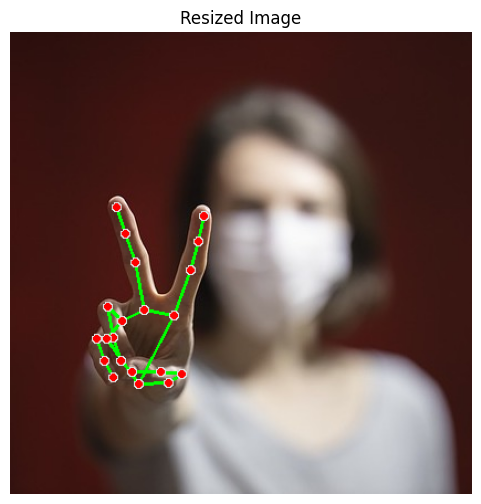

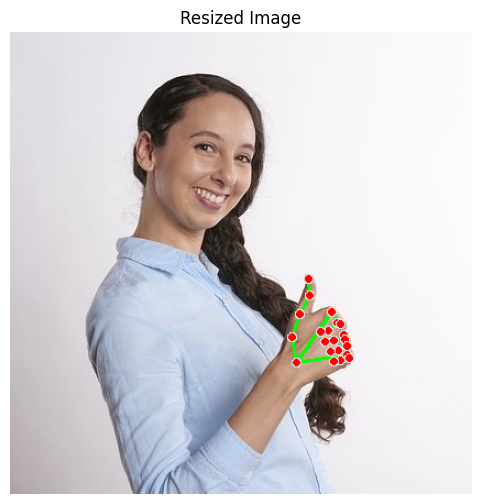

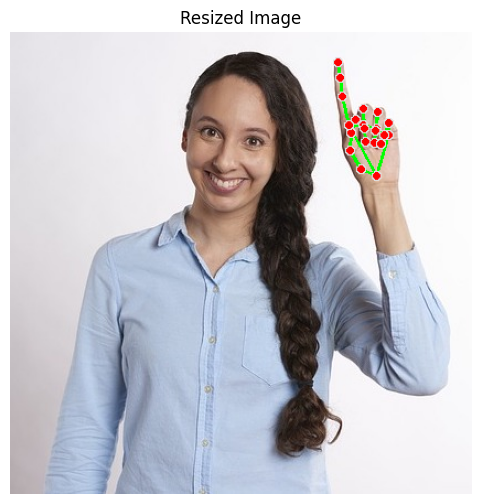

In [11]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Replace 'IMAGE_FILENAMES' with your list of image file paths
print(IMAGE_FILENAMES)
images_rgb = []  # Store RGB images
images_bgr = []  # Store BGR images for display

# Read and prepare images
for image_path in IMAGE_FILENAMES:
    image_bgr = cv2.imread(image_path)  # Load in BGR format
    images_bgr.append(image_bgr)  # Keep original BGR for later
    images_rgb.append(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))  # Convert to RGB

# Process images with Mediapipe Hands
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    for i, image_rgb in enumerate(images_rgb):
        # Process the image
        results = hands.process(image_rgb)

        # Check if any hands are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw the landmarks on the corresponding BGR image
                mp_drawing.draw_landmarks(
                    images_bgr[i],  # Original BGR image
                    hand_landmarks,  # Detected landmarks
                    mp_hands.HAND_CONNECTIONS,  # Hand connections for visual structure
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),  # Landmarks style
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)  # Connections style
                )

# Display all images with landmarks in Colab
for image_bgr in images_bgr:
  img_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(6, 6))
  plt.imshow(img_rgb)
  plt.axis('off')  # Hide axes
  plt.title("Resized Image")
  plt.show()


In [108]:
video = "example_gestures.mp4"
print(cv2.__version__)
raw_video = cv2.VideoCapture(video)
# print(len(raw_video.read()[1]))
success, images = raw_video.read()
fps = raw_video.get(cv2.CAP_PROP_FPS)
print(fps)

4.11.0
29.97002997002997


In [109]:
skip = 1
if(fps >= 30):
  skip = int(fps/30)
  if(skip == 0):
    skip = 1

In [110]:
rgb_imgs = []
bgr_imgs = []
i = 0
success, frame = raw_video.read()
while success:
    print(i ,skip)
    if(i % skip == 0):

      rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      rgb_imgs.append(rgb_frame)

      display_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2BGR)
      bgr_imgs.append(display_frame)

    # Show the frame
    # cv2_imshow(display_frame)

    # Read the next frame
    i += skip
    success, frame = raw_video.read()

# i = 0
# thirty_fps = []
# while(i < len(images)):
#   thirty_fps.append(images[i])
#   i += skip

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1
183 1
184 1


In [111]:
print(len(rgb_imgs))
print(len(bgr_imgs))

1393
1393


In [112]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
  example_result = hands.process(rgb_imgs[0])
  if example_result.multi_hand_landmarks:
      for hand_landmarks in example_result.multi_hand_landmarks:
          # Draw the landmarks on the corresponding BGR image
          mp_drawing.draw_landmarks(
              bgr_imgs[0],  # Original BGR image
              hand_landmarks,  # Detected landmarks
              mp_hands.HAND_CONNECTIONS,  # Hand connections for visual structure
              mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),  # Landmarks style
              mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)  # Connections style
          )

# with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
#   for h in rgb_imgs:
#     hand = hands.process(h)
#     if hand.multi_hand_landmarks:
#         for hand_landmarks in example_result.multi_hand_landmarks:
#             # Draw the landmarks on the corresponding BGR image
#             mp_drawing.draw_landmarks(
#                 bgr_imgs[0],  # Original BGR image
#                 hand_landmarks,  # Detected landmarks
#                 mp_hands.HAND_CONNECTIONS,  # Hand connections for visual structure
#                 mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),  # Landmarks style
#                 mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)  # Connections style
#             )

I0000 00:00:1744072395.115076 1308483 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1744072395.149578 1337203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744072395.162129 1337203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


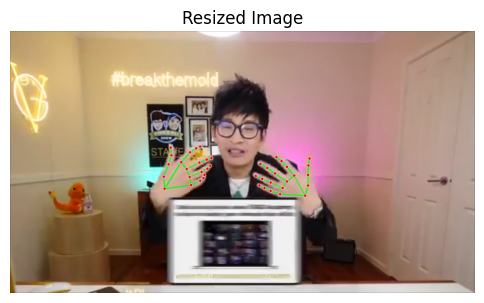

In [113]:
# for x in bgr_imgs:
    # img_rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    # plt.figure(figsize=(6, 6))
    # plt.imshow(img_rgb)
    # plt.axis('off')  # Hide axes
    # plt.title("Resized Image")
    # plt.show()

img_rgb = cv2.cvtColor(bgr_imgs[0], cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.title("Resized Image")
plt.show()

In [114]:
GestureRecognizerResult_Frames = []
Gestures_Frames = []

In [115]:
gesture_dict ={"Unknown": 0,
"Closed_Fist": 1,
"Open_Palm":2,
"Pointing_Up":3,
"Thumb_Down":4,
"Thumb_Up":5,
"Victory":6,
"ILoveYou":7,
"None":-1
}
num_dict ={0:"Unknown",
1:"Closed_Fist",
2:"Open_Palm",
3:"Pointing_Up",
4:"Thumb_Down",
5:"Thumb_Up",
6:"Victory",
7:"ILoveYou",
8:"None"
}

In [116]:
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
  for img in rgb_imgs:
    mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
    result = recognizer.recognize(mp_img)
    GestureRecognizerResult_Frames.append(result)
    frame = []
    for i in result.gestures:
      frame.append(gesture_dict[i[0].category_name])
    Gestures_Frames.append(frame)
print(len(GestureRecognizerResult_Frames))

I0000 00:00:1744072396.384673 1308483 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1744072396.390424 1337220 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744072396.395566 1337220 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1393


In [117]:
# making it divisible by 30 frames
for i in range(30 - len(GestureRecognizerResult_Frames) % 30):
    GestureRecognizerResult_Frames.append([])
print(len(GestureRecognizerResult_Frames))
# for i in range(len(GestureRecognizerResult_Frames)):
#     # print(GestureRecognizerResult_Frames[i].gestures)
#     for gesture in GestureRecognizerResult_Frames[i].gestures:
#         print(gesture)

1410


In [132]:
# for i in range (len(rgb_imgs)):
    # gesture_dict[GestureRecognizerResult_Frames[0].gestures[0][i].category_name]
seconds = []
frame_counter = 0
gesture_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range (len(rgb_imgs)):
    # Sometimes it doesnt detect a hand so when it doesn't we have to realize it and filler it
    if(GestureRecognizerResult_Frames[i] == []):
        gesture_counts[8] += 1
    elif(GestureRecognizerResult_Frames[i].gestures == []):
        gesture_counts[0] += 1
    elif(gesture_dict[GestureRecognizerResult_Frames[i].gestures[0][0].category_name] == -1):
        gesture_counts[0] += 1
    else:
        for gesture in GestureRecognizerResult_Frames[i].gestures:
            # print(gesture[0].category_name)
            gesture_counts[gesture_dict[gesture[0].category_name]] += 1
    biggest = 1
    if(frame_counter == 30):
        for num in range(len(gesture_counts) - 1):
            if(num != 0):
                if gesture_counts[biggest] < gesture_counts[num]:
                    biggest = num
        if(gesture_counts[biggest] == 0):
            if gesture_counts[0] < gesture_counts[8]:
                biggest = 8
            else:
                biggest = 0
        seconds.append(num_dict[biggest])
        print(biggest)
        print(gesture_counts)
        gesture_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        frame_counter = 0
    else:
        frame_counter += 1
    

    

0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
2
[29, 0, 1, 0, 0, 1, 0, 0, 2]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
2
[26, 0, 4, 1, 0, 0, 0, 0, 5]
2
[30, 0, 1, 0, 1, 0, 0, 0, 0]
4
[30, 0, 0, 0, 1, 0, 0, 0, 1]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
2
[25, 0, 6, 0, 0, 0, 0, 0, 6]
5
[29, 0, 0, 0, 0, 2, 0, 0, 1]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
2
[15, 0, 16, 0, 0, 1, 0, 0, 8]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
2
[30, 0, 1, 0, 0, 0, 0, 0, 1]
0
[31, 0, 0, 0, 0, 0, 0, 0, 0]
3
[30, 0, 0, 1, 0, 0, 0, 0, 1]
2
[25, 0, 4, 2, 0, 2, 0, 0, 4]
2
[29, 0, 2, 0, 0, 0, 0, 0, 2]
2
[19, 0, 15, 0, 0, 0, 0, 0, 7]
2
[6, 0, 35, 0, 0, 0, 0, 0, 9]
2
[25, 0, 5, 4, 0, 0, 0, 0, 2]
0
[31,

Get the Overall Gesture every second instead of 30 per second since it isn't that necessary

In [133]:
seconds

['Unknown',
 'Open_Palm',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Open_Palm',
 'Open_Palm',
 'Thumb_Down',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Open_Palm',
 'Thumb_Up',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Open_Palm',
 'Unknown',
 'Open_Palm',
 'Unknown',
 'Pointing_Up',
 'Open_Palm',
 'Open_Palm',
 'Open_Palm',
 'Open_Palm',
 'Open_Palm',
 'Unknown',
 'Unknown',
 'Open_Palm',
 'Thumb_Up',
 'Unknown',
 'Open_Palm',
 'Open_Palm',
 'Open_Palm',
 'Open_Palm',
 'Unknown',
 'Thumb_Up',
 'Unknown']